# Capstone Project 2 - Ron Hankey

## Machine Learning-Based Prediction of Diabetes Using CDC Health Indicators

### Problem statement: Diabetes significantly impacts the health and well-being of millions of people in the United States. It is a leading cause of serious health complications such as heart disease, stroke, kidney failure, blindness, and lower-limb amputations. The prevalence of diabetes leads to substantial medical costs, both direct and indirect, including hospitalizations, medical care, and lost work and wages. People living with diabetes often require lifelong care and management, including regular monitoring of blood sugar levels, adherence to dietary restrictions, and physical activity.

### As the illustration below from the Los Angeles Times shows, one in three adults in the USA could have diabetes by 2050 if current trends continue. So it is vitally important to examine the factors that are contributing to this disease and attempt to mitigate them. 

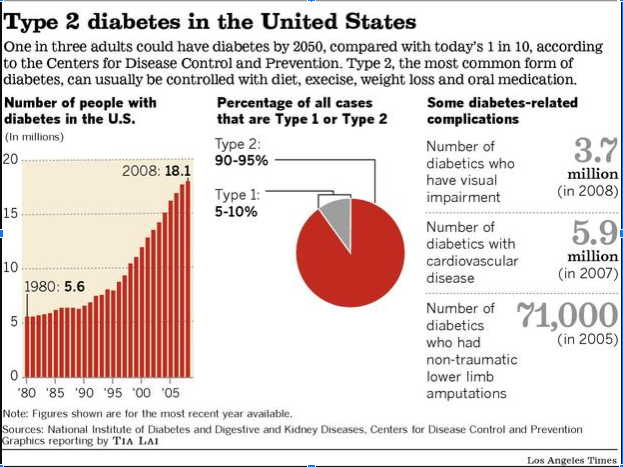

### In addition to the health costs associated with caring for diabetics, some states monitor health statistics regarding diabetes by practice, which can result in fines and legal action if it is determined that the practice population is not being properly managed.   

### The emotional and mental health burden is also notable, as managing diabetes can be stressful and may lead to anxiety and depression. Additionally, certain populations, including older adults, certain racial and ethnic groups, and those with lower socioeconomic status, are disproportionately affected by diabetes, highlighting a need for targeted public health interventions. The epidemic of diabetes underscores the importance of public health efforts focused on prevention, early detection, and effective management to mitigate its impact on individuals and society as a whole.

In [ ]:
# Make sure the requisite library is installed
!pip install ucimlrepo

In [1]:
# Import the pandas, and ucimlrepo libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

### Start Data Wrangling

In [2]:
# Fetch the diabetes dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets

In [3]:
# Load a dataframe with the target variable
target_df = pd.DataFrame(y)

In [4]:
# Check the data was loaded
target_df.head()

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0


In [6]:
# Load a dataframe with the features 
features_df = pd.DataFrame(X)

In [7]:
# Check the data
features_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [8]:
# Merge the 2 dataframes into 1
merged_df = target_df.merge(features_df, left_index=True, right_index=True)

In [10]:
# Check the merged data
merged_df.head(20)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,...,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,...,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,...,1,0,3,0,0,1,0,11,4,4
8,1,1,1,1,30,1,0,1,0,1,...,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,...,1,0,2,0,0,0,1,8,4,3


In [11]:
# Examine the metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# Examine the variable information 
print(cdc_diabetes_health_indicators.variables) 

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [4]:
# Access the 'features' part directly
features_data = cdc_diabetes_health_indicators.data

In [5]:
# Import the features (data) into a Pandas dataframe
features_df = pd.DataFrame(features_data.features)

In [6]:
# Examine the data
features_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [12]:
# Make sure we have the number of rows that are supposed to exist in the data set (253680)
merged_df.shape

(253680, 22)

In [13]:
# Do some preliminary statistices
merged_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [14]:
# How much memory is the data set consuming
merged_df.size

5580960

In [15]:
# Check for NULL values
merged_df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [16]:
# Put the column names in a dataframe for processing
df_cols = merged_df.columns

In [17]:
# Make sure we have an index
type(df_cols)

pandas.core.indexes.base.Index

In [28]:
# Check the unique values of each column and verify they look 
for column_name in merged_df.columns:
    print(f"Unique values: {column_name} for column:", merged_df[column_name].unique())

Unique values: Diabetes_binary for column: [0 1]
Unique values: HighBP for column: [1 0]
Unique values: HighChol for column: [1 0]
Unique values: CholCheck for column: [1 0]
Unique values: BMI for column: [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Unique values: Smoker for column: [1 0]
Unique values: Stroke for column: [0 1]
Unique values: HeartDiseaseorAttack for column: [0 1]
Unique values: PhysActivity for column: [0 1]
Unique values: Fruits for column: [0 1]
Unique values: Veggies for column: [1 0]
Unique values: HvyAlcoholConsump for column: [0 1]
Unique values: AnyHealthcare for column: [1 0]
Unique values: NoDocbcCost for column: [0 1]
Unique values: GenHlth for column: [5 3 2 4 1]
Unique values: MentHlth for column: [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14

In [20]:
# Save the files so we do not have to import it each time.
file_path = 'D:\Data_Science_Bootcamp_Springboard\Capstone_2\cdc_diabetes_target.csv'
target_df.to_csv(file_path, index=False, sep=',', encoding='utf-8')
file_path = 'D:\Data_Science_Bootcamp_Springboard\Capstone_2\cdc_diabetes_features.csv'
features_df.to_csv(file_path, index=False, sep=',', encoding='utf-8')
file_path = 'D:\Data_Science_Bootcamp_Springboard\Capstone_2\cdc_diabetes_merged.csv'
merged_df.to_csv(file_path, index=False, sep=',', encoding='utf-8')

### We can conclude that the data set matches the UC Irving Machine Learning Repository CDC Duiabetes data set
### The data is complete, there are no missing values and does not require any other wrangling.
### The data set is ready for use in the next phase Exploratory Data Analysis (EDA)

## End of Data Wrangling

## Begin Exploratory Data Analysis (EDA)

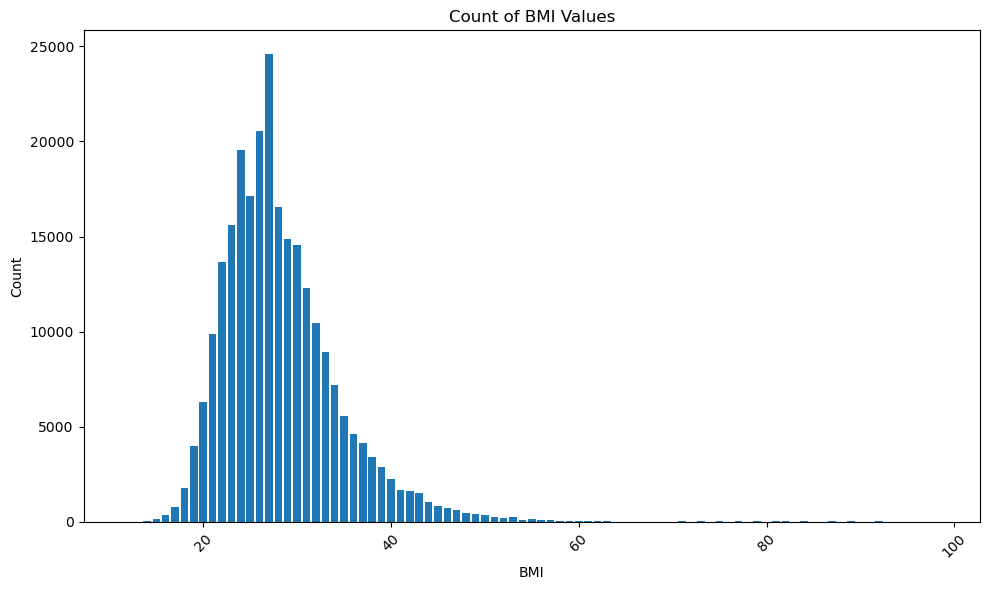

In [21]:
# Let's plot the BMI and see how it is distributed by value
# Count the occurrences of each unique value in the "BMI" column
bmi_counts = features_df['BMI'].value_counts()

# Create the bar chart
# Set the figure size
plt.figure(figsize=(10, 6))  

# Plot the bar chart using plt.bar()
plt.bar(bmi_counts.index, bmi_counts.values)

# Always add labels and titles
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Count of BMI Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure all elements fit within the figure
plt.tight_layout()  
# Show the plot
plt.show()

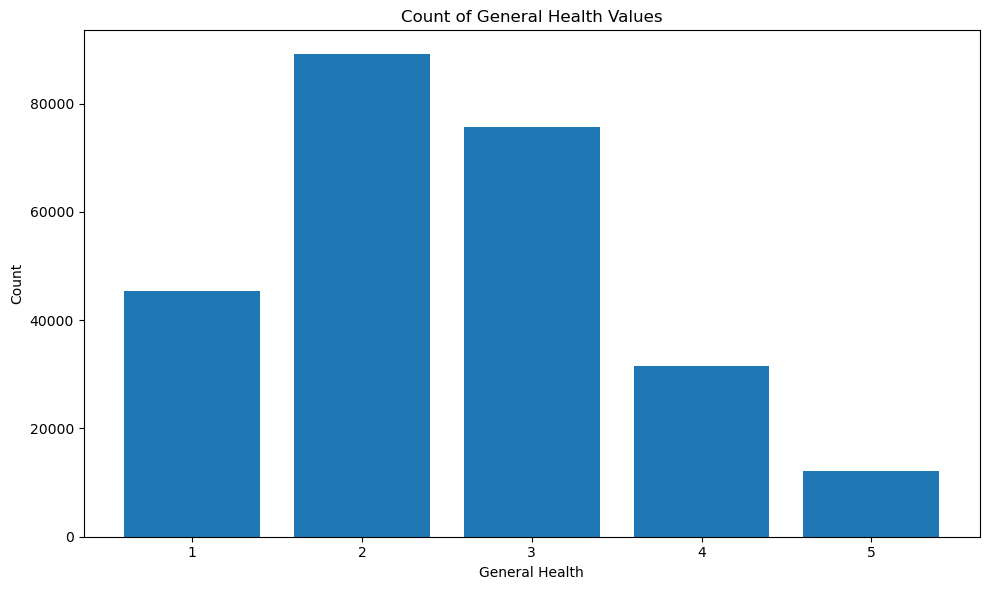

In [23]:
# Let's plot the General Health and see how it is distributed by value
# Count the occurrences of each unique value in the "GenHlth" column
bmi_counts = features_df['GenHlth'].value_counts()

# Create the bar chart
# Set the figure size
plt.figure(figsize=(10, 6))  

# Plot the bar chart using plt.bar()
plt.bar(bmi_counts.index, bmi_counts.values)

# Always add labels and titles
plt.xlabel('General Health')
plt.ylabel('Count')
plt.title('Count of General Health Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Ensure all elements fit within the figure
plt.tight_layout()  
# Show the plot
plt.show()

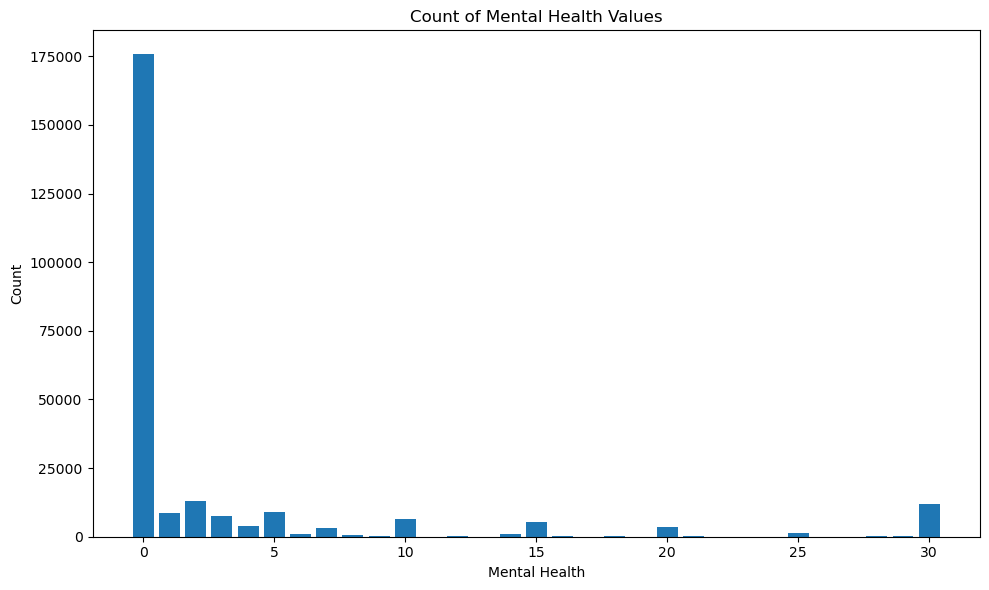

In [24]:
# Let's plot the Mental Health and see how it is distributed by value
# Count the occurrences of each unique value in the "MentHlth" column
bmi_counts = features_df['MentHlth'].value_counts()

# Create the bar chart
# Set the figure size
plt.figure(figsize=(10, 6))  

# Plot the bar chart using plt.bar()
plt.bar(bmi_counts.index, bmi_counts.values)

# Always add labels and titles
plt.xlabel('Mental Health')
plt.ylabel('Count')
plt.title('Count of Mental Health Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Ensure all elements fit within the figure
plt.tight_layout()  
# Show the plot
plt.show()

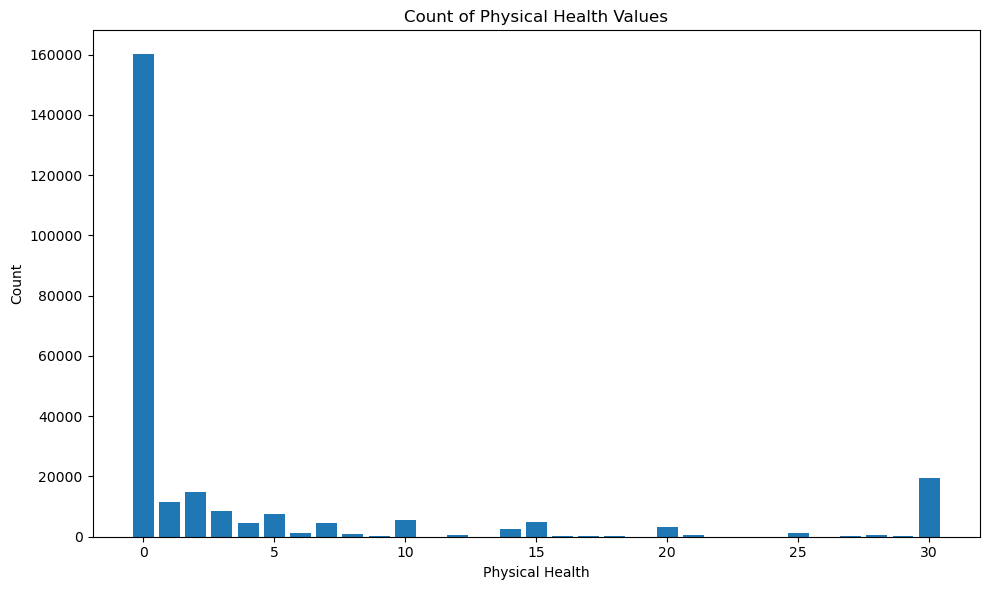

In [29]:
# Let's plot the Physical Health and see how it is distributed by value
# Count the occurrences of each unique value in the "PhysHlth" column
bmi_counts = features_df['PhysHlth'].value_counts()

# Create the bar chart
# Set the figure size
plt.figure(figsize=(10, 6))  

# Plot the bar chart using plt.bar()
plt.bar(bmi_counts.index, bmi_counts.values)

# Always add labels and titles
plt.xlabel('Physical Health')
plt.ylabel('Count')
plt.title('Count of Physical Health Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Ensure all elements fit within the figure
plt.tight_layout()  
# Show the plot
plt.show()

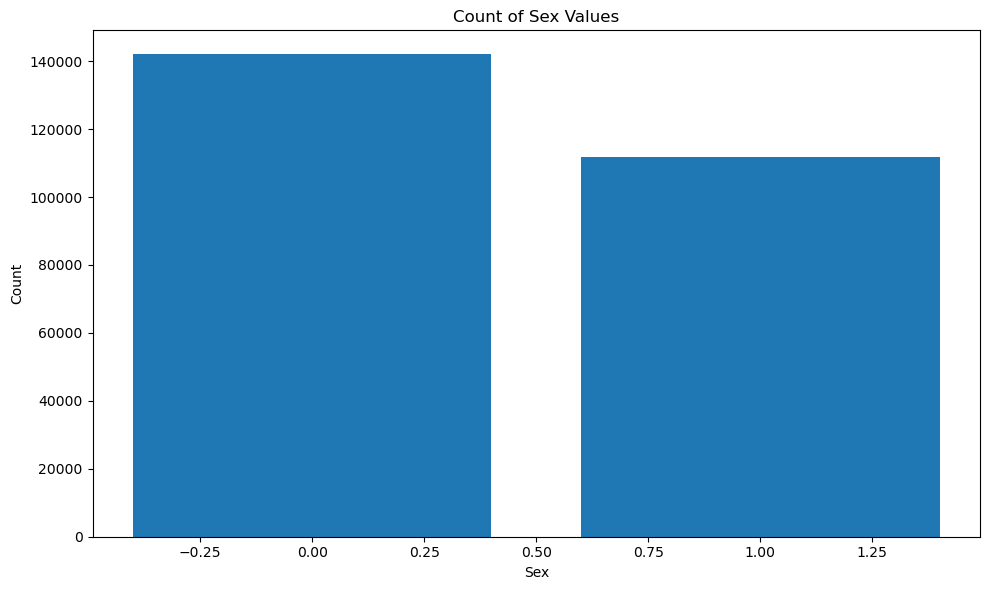

In [31]:
# Let's plot the sex count and see how it is distributed in this data set
# Count the occurrences of each unique value in the "Sex" column
bmi_counts = features_df['Sex'].value_counts()

# Create the bar chart
# Set the figure size
plt.figure(figsize=(10, 6))  

# Plot the bar chart using plt.bar()
plt.bar(bmi_counts.index, bmi_counts.values)

# Always add labels and titles
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Sex Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Ensure all elements fit within the figure
plt.tight_layout()  
# Show the plot
plt.show()

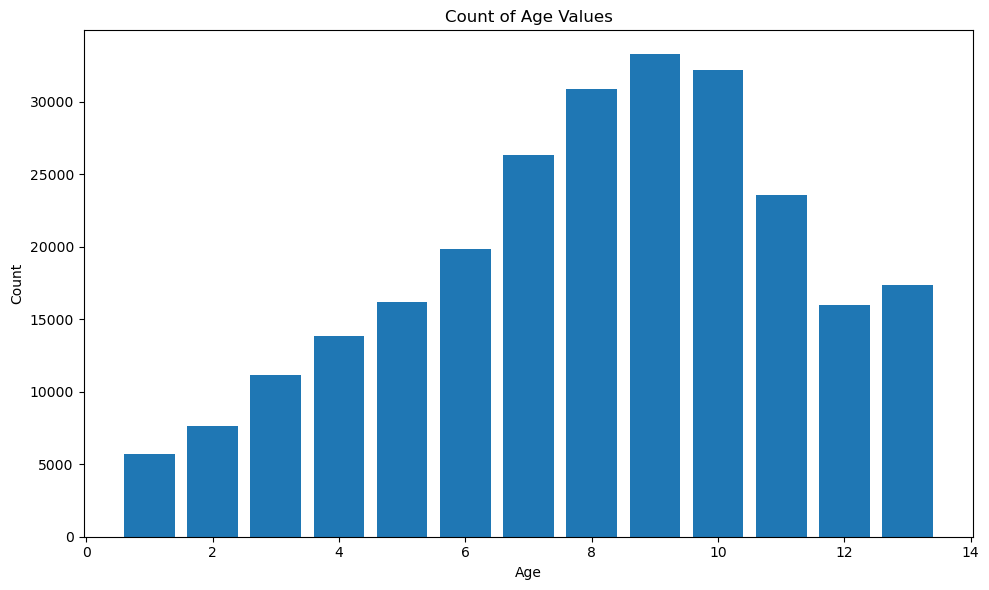

In [32]:
# Let's plot the age count and see how it is distributed in this data set
# Count the occurrences of each unique value in the "Age" column
bmi_counts = features_df['Age'].value_counts()

# Create the bar chart
# Set the figure size
plt.figure(figsize=(10, 6))  

# Plot the bar chart using plt.bar()
plt.bar(bmi_counts.index, bmi_counts.values)

# Always add labels and titles
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Age Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Ensure all elements fit within the figure
plt.tight_layout()  
# Show the plot
plt.show()

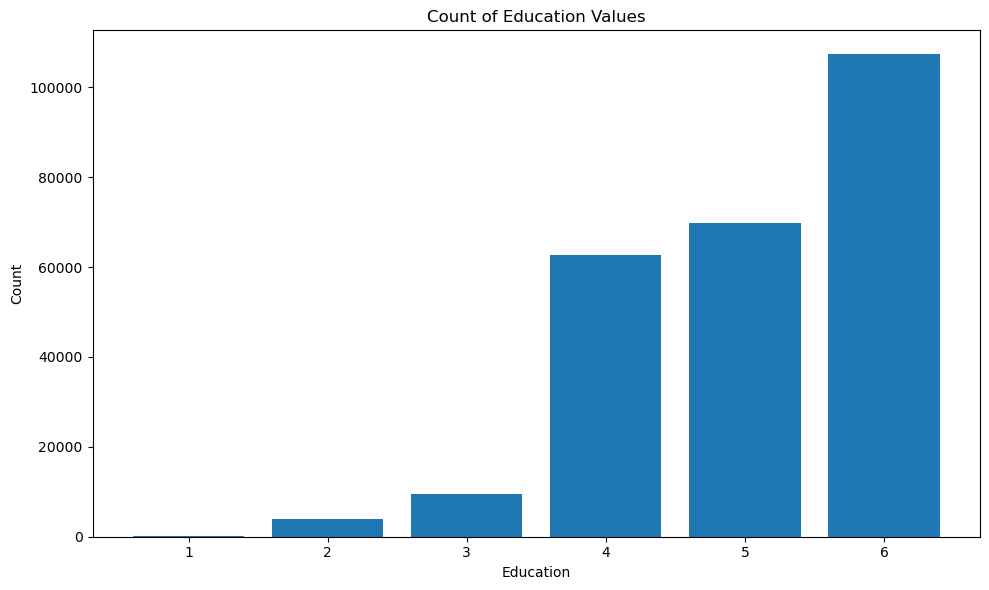

In [33]:
# Let's plot the Education count and see how it is distributed in this data set
# Count the occurrences of each unique value in the "Education" column
bmi_counts = features_df['Education'].value_counts()

# Create the bar chart
# Set the figure size
plt.figure(figsize=(10, 6))  

# Plot the bar chart using plt.bar()
plt.bar(bmi_counts.index, bmi_counts.values)

# Always add labels and titles
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Count of Education Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Ensure all elements fit within the figure
plt.tight_layout()  
# Show the plot
plt.show()

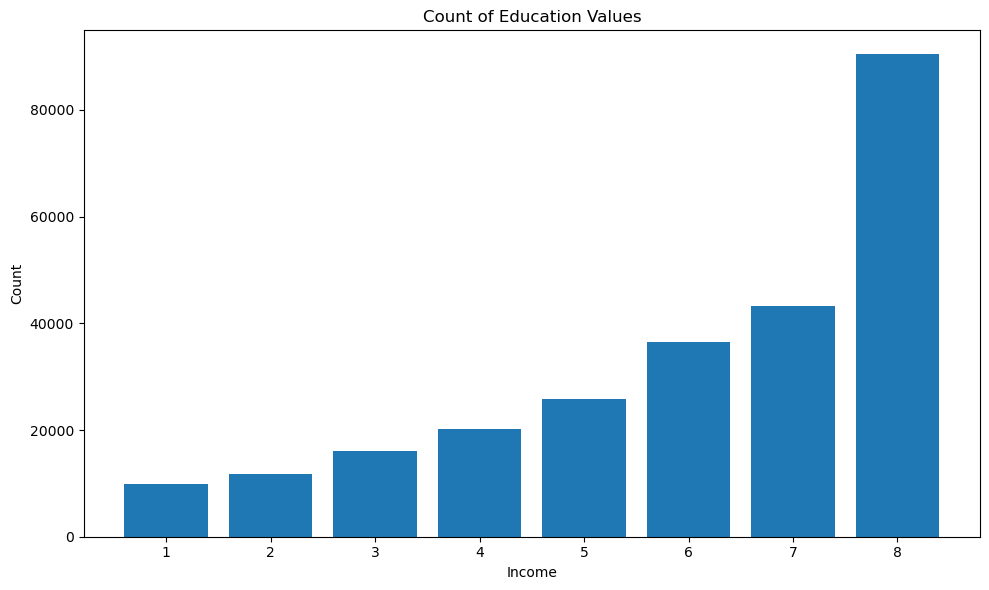

In [34]:
# Let's plot the Income count and see how it is distributed in this data set
# Count the occurrences of each unique value in the "Income" column
bmi_counts = features_df['Income'].value_counts()

# Create the bar chart
# Set the figure size
plt.figure(figsize=(10, 6))  

# Plot the bar chart using plt.bar()
plt.bar(bmi_counts.index, bmi_counts.values)

# Always add labels and titles
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Count of Education Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Ensure all elements fit within the figure
plt.tight_layout()  
# Show the plot
plt.show()

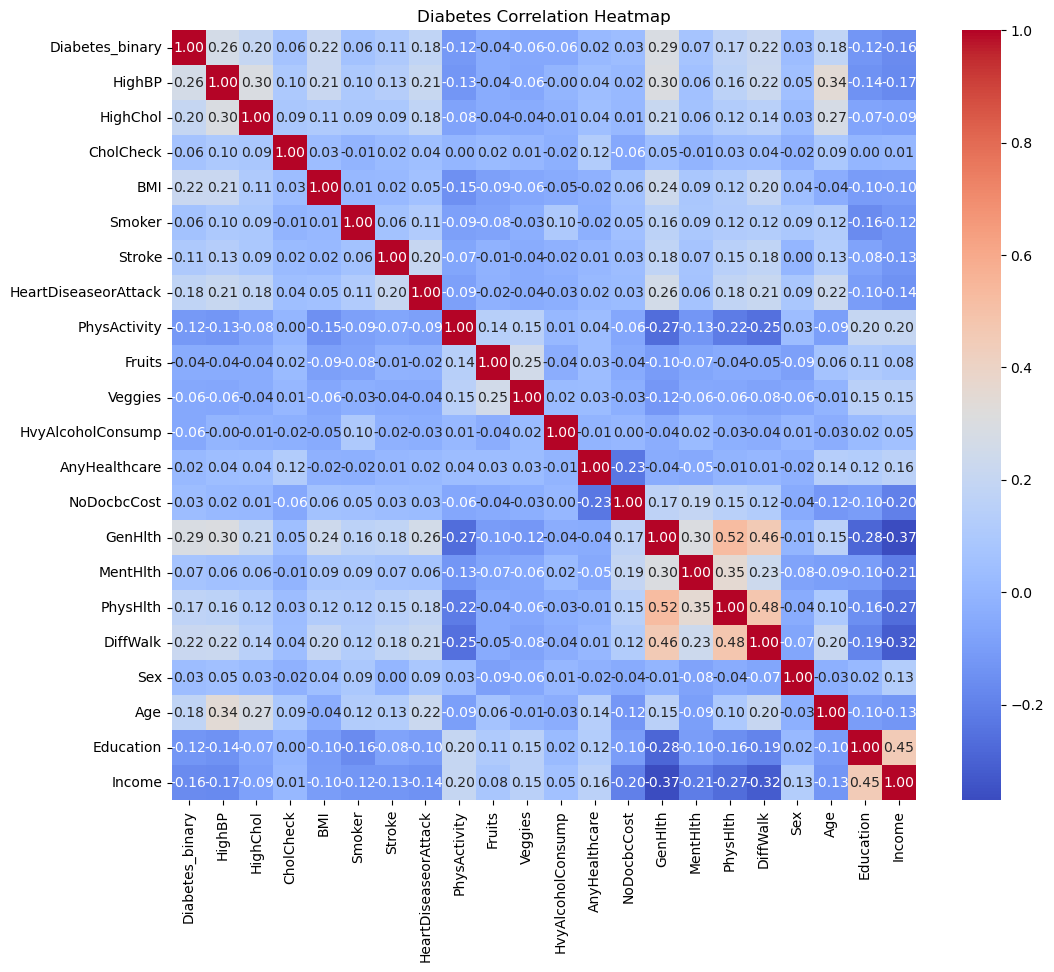

In [36]:
# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Set up the Seaborn heatmap
plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title
plt.title("Diabetes Correlation Heatmap")

# Show the plot
plt.show()

In [38]:
# Calculate the Pearson correlation coefficients
correlation_matrix = merged_df.corr(method='pearson')

In [39]:
print("The Pearson correlation coefficients:", correlation_matrix)

The Pearson correlation coefficients:                       Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.263129  0.200276   0.064761   
HighBP                       0.263129  1.000000  0.298199   0.098508   
HighChol                     0.200276  0.298199  1.000000   0.085642   
CholCheck                    0.064761  0.098508  0.085642   1.000000   
BMI                          0.216843  0.213748  0.106722   0.034495   
Smoker                       0.060789  0.096991  0.091299  -0.009929   
Stroke                       0.105816  0.129575  0.092620   0.024158   
HeartDiseaseorAttack         0.177282  0.209361  0.180765   0.044206   
PhysActivity                -0.118133 -0.125267 -0.078046   0.004190   
Fruits                      -0.040779 -0.040555 -0.040859   0.023849   
Veggies                     -0.056584 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump           -0.057056 -0.003972 -0.011543  -0.023730   
AnyHealthcare             